# Задание 1: работа с цветовым пространством HSV.
# На практике познакомились с преимуществами использования пространства HSV. Если кратко, то с помощью этой модели легче описывать цвет, который # # мы хотим получить. Поскольку здесь мы оперируем понятиями H = Hue = оттенок, S = Saturation = насыщенность, V = Value = яркость.
# Используя модель HSV попробуйте еще раз выполнить задание по превращению "starry_night" в "starry_day" (из дз №1)



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

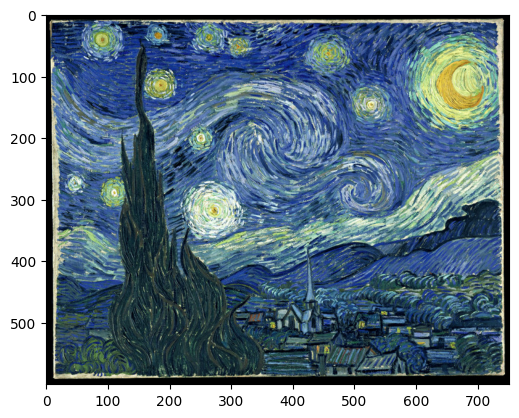

In [2]:
img = cv2.imread("starry_night.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)

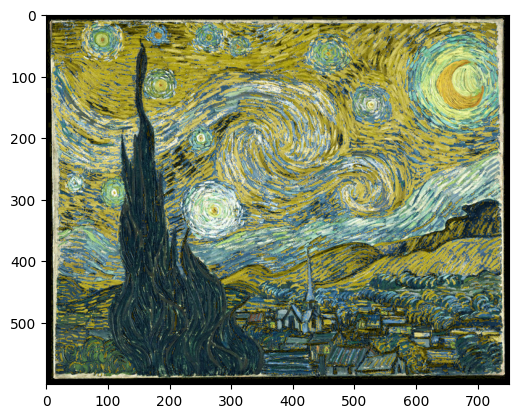

In [3]:
mh = 105
alf = 30
# поиск темно-синих тонов
Navy_blue = img_hsv[:, :, 0] > mh
# их замена
starry_day = np.copy(img_hsv)
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        if Navy_blue[y,x]:
            # Смистить в желтую зону
            starry_day[y,x,0] = starry_day[y,x,0]/4
            # Осветлить
            starry_day[y,x,2] = min(255, starry_day[y,x,2] + alf)
plt.imshow(cv2.cvtColor(starry_day, cv2.COLOR_HSV2RGB))

# Задание 2: На занятии мы разобрали несколько подходов для того, чтобы "размыть" изображение. Для этого мы использовали фильтры, представленные различными матрицами (ядрами). Вопрос - как нам решить обратную задачу? Т.е., имея размытое изображение, как сделать его более четким? Попробуйте подобрать матрицу, которая может это сделать.

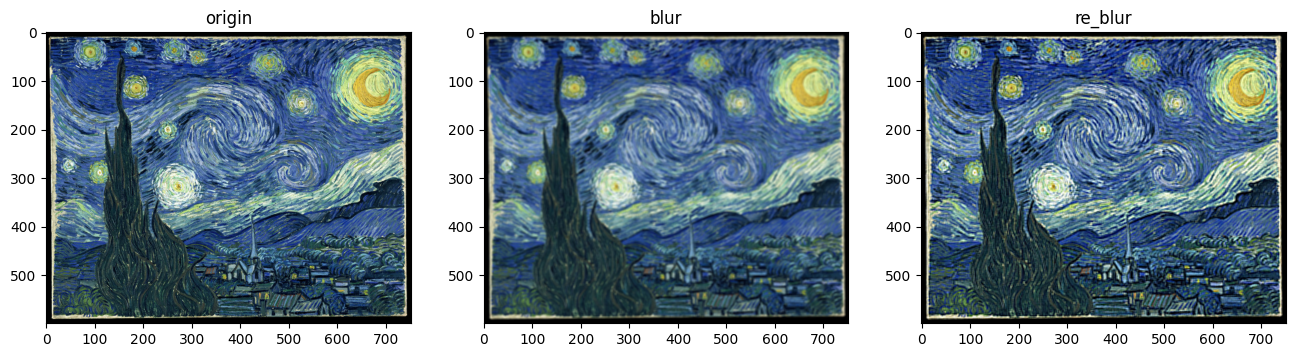

In [4]:
kernel_blur = np.ones((5, 5), np.float32) * 1/25
kernel_unblur = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
blur = cv2.filter2D(img, -1, kernel_blur)
re_blur = cv2.filter2D(blur, -1, kernel_unblur)
plt.figure(figsize=(16, 8)) 
plt.subplot(131,), plt.imshow(img), plt.title('origin')
plt.subplot(132), plt.imshow(blur), plt.title('blur')
plt.subplot(133), plt.imshow(re_blur), plt.title('re_blur')
plt.show()